## *Задача 1. Генераторы разреженных матриц* 


Реализовать с помощью scipy генератор полосатых матриц, который должен поддерживать функции:
* Генерация абсолютно случайной полосатой матрицы $n\times m$
* Генерация полосатой матрицы с постоянными коэффициентами вдоль каждой полосы $n\times n$
* Генерация случайного возмущения матрицы $n\times m$, каждый элемент которой не превосходит по модулю заданный $\varepsilon$
* Генерация полосатой матрицы, в которой полосы заданы векторами.

 Сравнить три приведённых ниже метода создания матриц между собой по использованию памяти, используя измерение размера объектов в Python (sys.getsizeof(object[, default])). 
 Реализовать генератор матриц всеми тремя методами, сравнить их также по скорости (для решения систем уравнений).

Для повышения производительности можно использовать sparse.linalg.splu(A).solve(b) , который использует LU-декомпозицию, после чего объект SuperLU  имеет свой собственный метод solve.

Реализуйте генератор матриц, используя этот метод. 
https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg   

Убедитесь измерением времени работы, что он работает быстрее. Однако третий метод считается самым предпочтительным. Найдите, в чём недостаток предложенного метода, и покажите его с помощью измерений.

Для измерений можно использовать 

https://docs.python.org/3/library/resource.html#resource-usage  

In [8]:
import sys as ss
import scipy
import numpy as np
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m]).toarray()
x = scipy.linalg.solve(A, b)
print(A, x, sep = '\n')


AttributeError: module 'scipy' has no attribute 'sparse'

In [9]:
import sys as ss
import scipy
import numpy as np
N = 10 
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
A = np.zeros((2 * m + 1, N))
A[0] = Ae
A[m - 1] = An
A[m] = Ap
A[m + 1] = As
A[2 * m] = Aw
x = scipy.linalg.solve_banded((m, m), A, b)
print(A, x, sep = '\n')

AttributeError: module 'scipy' has no attribute 'linalg'

In [10]:
import sys as ss
import scipy
import numpy as np
from scipy.sparse.linalg import spsolve
N = 10
m = 3
Ap, As, An, Aw, Ae = np.ones(N), np.ones(N), np.ones(N), np.ones(N), np.ones(N)
diagonals = [Ap, As, An, Aw, Ae]
A = scipy.sparse.diags(diagonals, [0, -1, 1, -m, m])
x = spsolve(A,b)

# убрали .toarray() - чтобы сохранить разреженную форму

# https://docs.scipy.org/doc/scipy/reference/sparse.linalg.html#module-scipy.sparse.linalg 

print(A, x, sep = '\n')


NameError: name 'b' is not defined

# Задача 2. Метод Якоби.


Реализуйте метод итераций для решения системы линейных уравнений (метод Якоби). Для этого перепишите уравнение $A x=b$, выделив диагональную часть матрицы $A$ :

$$
A=D+(A-D),
$$

в виде

$$
x_{n+1}=B x_n+c,
$$

где $B=D^{-1}(D-A)$. Найдите $c$.
Создайте случайную матрицу с диагональным доминированием. 



In [11]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : "serif", "font.size" : 15})
rnd = np.random. RandomState (1234)
n=10
A= rnd.uniform (size=(n,n))+np.diag([15]*n)
b= rnd.uniform (size=n)

Вычислите норму соотвутствующей матрицы $B$ и выполните итерации Якоби. Убедитесь, что результирующий вектор $x$ действительно решает исходную систему.

Матрица $A$, с которой вы работали выше, по построению доминируется диагональю. Что произойдёт, если уменьшать величину диагональных элементов? Проверьте сходимость итераций Якоби (вычислите также норму матрицы $B$ ). 

__Решение__

$Ax = (D + A-D)x = Dx + (A-D)x = b \Leftrightarrow x = D^{-1}(D-A)x + D^{-1}b = Bx + c$

$x_{k+1} = Bx_{k} + c$

In [12]:
def jacob(A, b, x0=None, eps=1e-6):
    D = np.diag(np.diag(A))
    B = np.linalg.inv(D) @ (D - A)
    c = np.linalg.inv(D) @ b
    
    if x0 is None:
        x0 = np.zeros(D.shape[0]).T
    x = [x0]
    
    diff = 1
    while diff > eps:
        x.append(B@x[-1] + c)
        diff = np.linalg.norm(x[-1]-x[-2], ord=2)

    print("Норма B: ", np.linalg.norm(B, ord=2))
    return x

Норма B:  0.31853784252598116


Text(0, 0.5, '$||Ax_N-b||^2_2$')

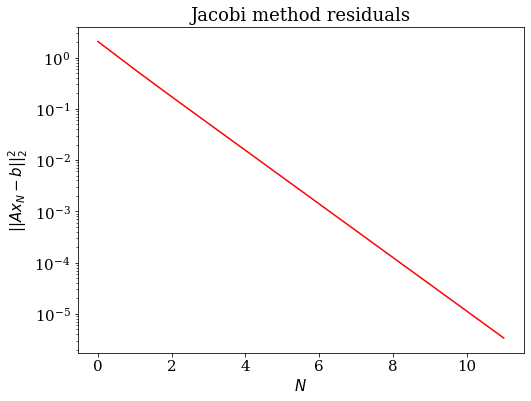

In [13]:
x = jacob(A, b)


res = []
for i in range(len(x)):
    res.append(np.linalg.norm(A@x[i] - b, ord=2))
    
    
fig, ax = plt.subplots()

fig.set_size_inches(8, 6)
ax.semilogy(res, color="red")
ax.set_title("Jacobi method residuals")
ax.set_xlabel("$N$")
ax.set_ylabel("$||Ax_N-b||^2_2$")

Норма B:  0.31853784252598116
Норма B:  0.3406178896769193
Норма B:  0.36598918272357145
Норма B:  0.39544749436992493
Норма B:  0.4300678819915193
Норма B:  0.4713391399140566
Норма B:  0.5213843126934741
Норма B:  0.5833393274617781
Норма B:  0.6620402825738391
Норма B:  0.7653600109101562
Норма B:  0.9070463899591017


/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_85312/118843605.py:13: RuntimeWarning: overflow encountered in subtract
  diff = np.linalg.norm(x[-1]-x[-2], ord=2)
/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_85312/118843605.py:12: RuntimeWarning: overflow encountered in matmul
  x.append(B@x[-1] + c)
/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_85312/118843605.py:12: RuntimeWarning: invalid value encountered in matmul
  x.append(B@x[-1] + c)
/var/folders/h9/ll8t8frd1r575llt96l1glhm0000gn/T/ipykernel_85312/964446319.py:13: RuntimeWarning: overflow encountered in matmul
  res.append(np.linalg.norm(A_new@x[i] - b, ord=2))


Норма B:  1.1134977718727903
Норма B:  1.4428360563572329


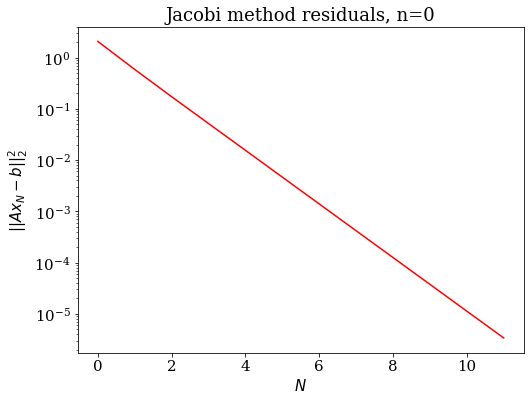

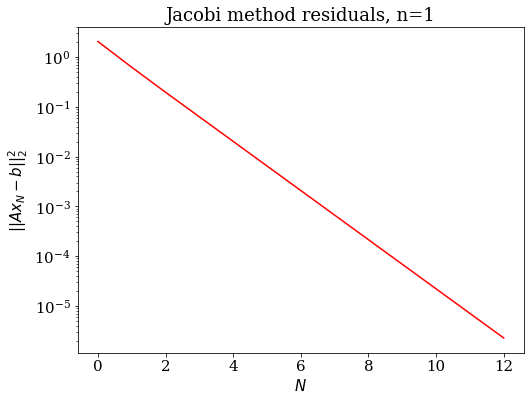

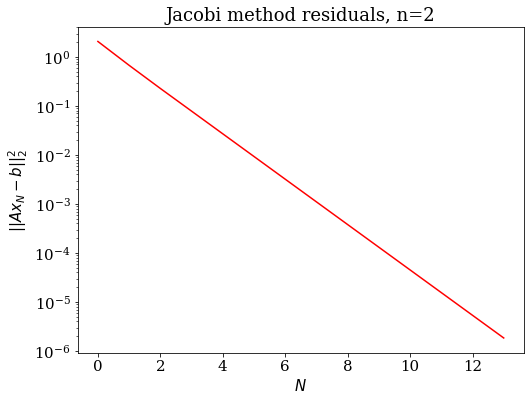

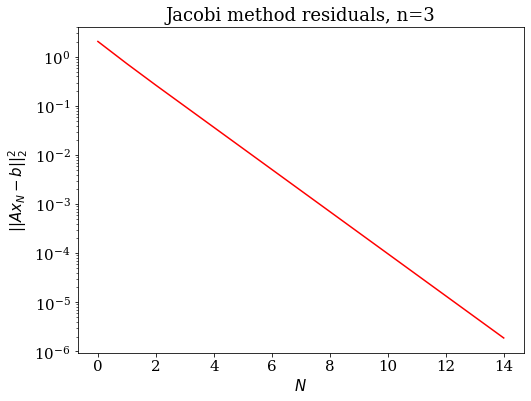

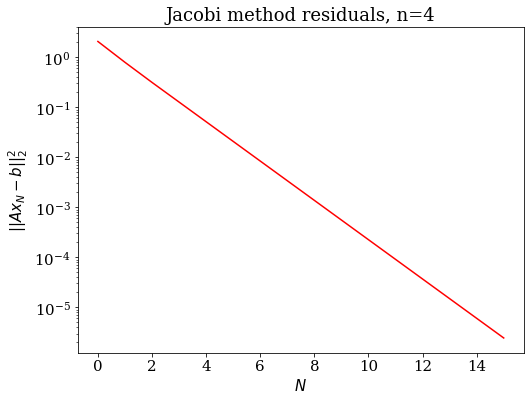

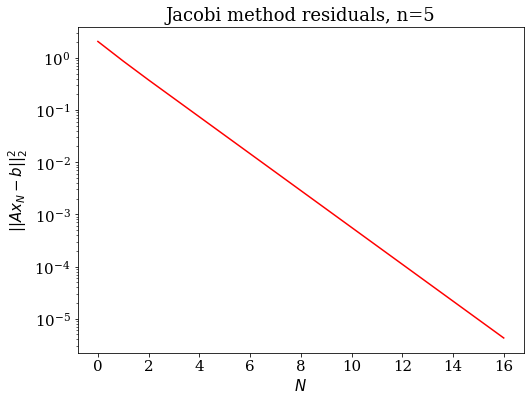

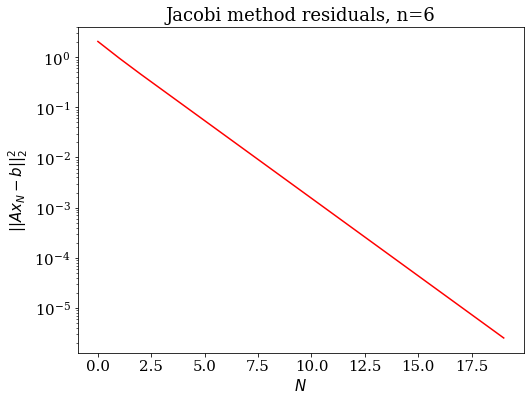

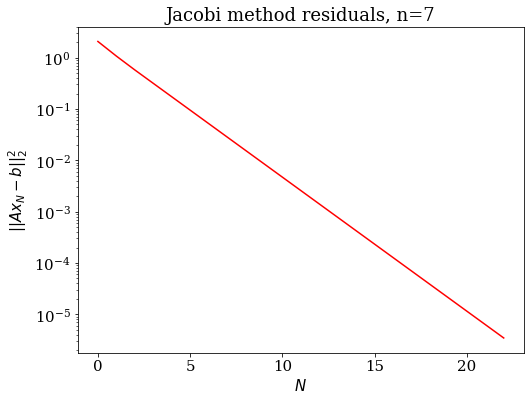

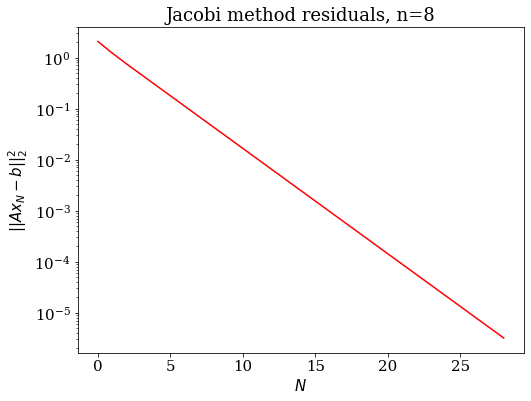

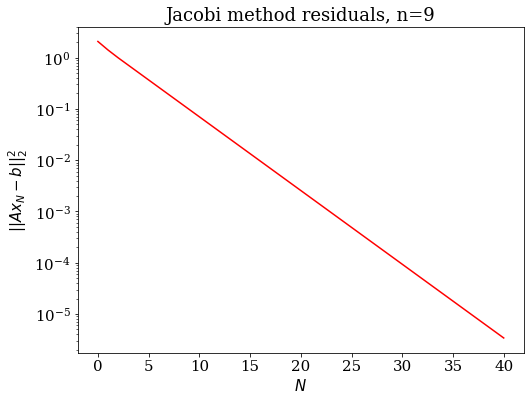

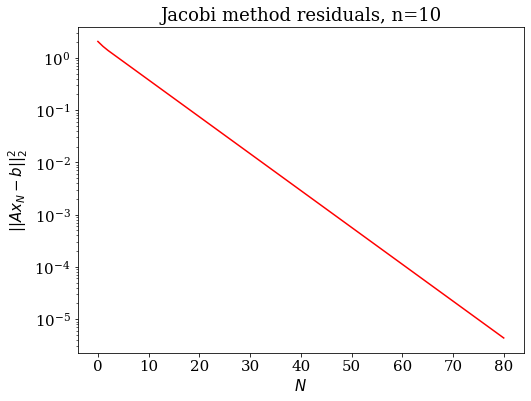

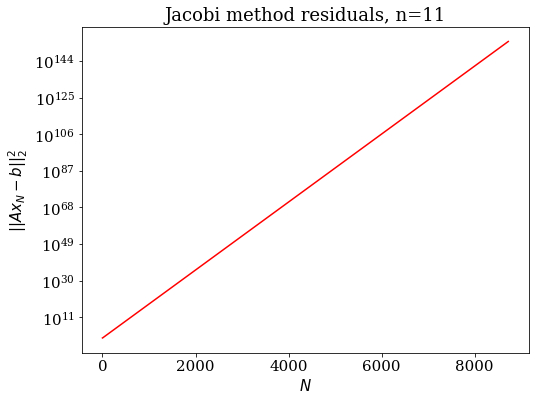

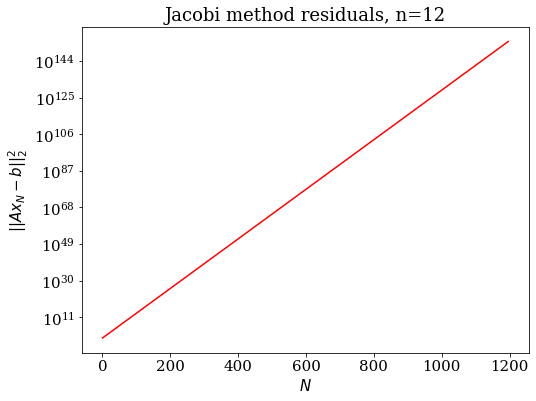

In [14]:
#Уменьшаем элементы диагонали, ||B|| < 1 - условие сходимости

N = []
for n in range(0, 13, 1):
    A_new = A - n*np.diag(np.ones(A.shape[0]))

    x = jacob(A_new, b)
    N.append(len(x))


    res = []
    for i in range(len(x)):
        res.append(np.linalg.norm(A_new@x[i] - b, ord=2))


    fig, ax = plt.subplots()

    fig.set_size_inches(8, 6)
    ax.semilogy(res, color="red")
    ax.set_title("Jacobi method residuals, n={}".format(n))
    ax.set_xlabel("$N$")
    ax.set_ylabel("$||Ax_N-b||^2_2$")

ValueError: x and y must have same first dimension, but have shapes (7,) and (13,)

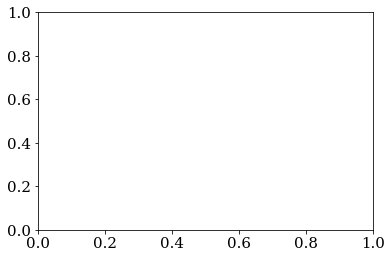

In [15]:
plt.plot(np.arange(0, 13, 2), N)
plt.xlabel("N для A* = A - NE")
plt.ylabel("Число шагов до сходимости")

# Задача 3. Метод вращений и QR-разложение.

После первой стадии метода вращений Гивенса система имеет вид 

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(1)} x_2+a_{23}^{(1)} x_3+\ldots+a_{2 n}^{(1)} x_n=b_2^{(1)} \text {, }\\
\ldots\\
&a_{n 2}^{(1)} x_2+a_{n 3}^{(1)} x_3+\ldots+a_{n n}^{(1)} x_n=b_n^{(1)} .
\end{aligned} 

Доказать следующие формулы: 
$$
\begin{aligned}
&a_{1 j}^{(l-1)}=c_{1 l} a_{1 j}^{(l-2)}+s_{1 l} a_{l j}, \quad a_{l j}^{(1)}=-s_{1 l} a_{1 j}^{(l-2)}+c_{1 l} a_{l j}, \quad a_{1 j}^{(0)}=a_{1 j},\\
&\begin{aligned}
& j=1,2, \ldots, n, \\
b_1^{(l-1)}=c_{1 l} b_1^{(l-2)}+s_{1 l} b_l, \quad \quad b_l^{(1)}=&-s_{1 l} b_1^{(l-2)}+c_{1 l} b_l, \\
l=2,3, \ldots, n,
\end{aligned}\\
&c_{1 l}=\frac{a_{11}^{(l-2)}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}}, \quad s_{1 l}=\frac{a_{l 1}}{\sqrt{\left(a_{11}^{(l-2)}\right)^2+a_{l 1}^2}},
\\
& l=2,3, \ldots, n,\\
\end{aligned}
$$

После второй стадии метода вращения Гивенса система уравнений имеет вид:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)}\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
&a_{33}^{(2)} x_3+\ldots+a_{3 n}^{(2)} x_n=b_3^{(2)} \text {, }\\
\ldots \\
&a_{n 3}^{(2)} x_3+\ldots+a_{n n}^{(2)} x_n=b_n^{(2)}
\end{aligned}  

Доказать следующие формулы 
$$
\begin{aligned}
&a_{2 j}^{(l-1)}=c_{2 l} a_{2 j}^{(l-2)}+s_{2 l} a_{l j}^{(1)}, \quad a_{l j}^{(2)}=-s_{2 l} a_{2 j}^{(l-2)}+c_{2 l} a_{l j}^{(1)} \text {, }\\
&j=2,3, \ldots, n\\
&\begin{aligned}
b_2^{(l-1)}=c_{2 l} b_2^{(l-2)}+s_{2 l} b_l^{(1)}, \quad \quad b_l^{(2)}=&-s_{2 l} b_2^{(l-2)}+c_{2 l} b_l^{(1)}, \\
& l=3,4, \ldots, n,
\end{aligned}\\
&c_{2 l}=\frac{a_{22}^{(l-2)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}, \quad s_{2 l}=\frac{a_{l 2}^{(1)}}{\sqrt{\left(a_{22}^{(l-2)}\right)^2+\left(a_{l 2}^{(1)}\right)^2}}
\end{aligned}  
$$

После (n-1) шагов метода Гивенса получаем систему:

\begin{aligned}
&a_{11}^{(n-1)} x_1+a_{12}^{(n-1)} x_2+a_{13}^{(n-1)} x_3+\ldots+a_{1 n}^{(n-1)} x_n=b_1^{(n-1)},\\
&a_{22}^{(n-1)} x_2+a_{23}^{(n-1)} x_3+\ldots+a_{2 n}^{(n-1)} x_n=b_2^{(n-1)} \text {, }\\
\ldots \\
&a_{n n}^{(n-1)} x_n=b_n^{(n-1)} \text {, }
\end{aligned}  




Где

\begin{aligned}
&a_{k j}^{(l-1)}=c_{k l} a_{k j}^{(l-2)}+s_{k l} a_{l j}^{(k-1)}, \quad a_{l j}^{(k)}=-s_{k l} a_{k j}^{(l-2)}+c_{k l} a_{l j}^{(k-1)}\\
&j=k, k+1, \ldots, n,\\
&b_k^{(l-1)}=c_{k l} b_k^{(l-2)}+s_{k l} b_l^{(k-1)}, \quad b_l^{(k)}=-s_{k l} b_k^{(l-2)}+c_{k l} b_l^{(k-1)} \text {, }\\
&k=1, \ldots, n, \quad l=k+1, \ldots, n
\end{aligned} 

а  
$$
c_{k l}=\frac{a_{k k}^{(l-2)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}, \quad s_{k l}=\frac{a_{l k}^{(k-1)}}{\sqrt{\left(a_{k k}^{(l-2)}\right)^2+\left(a_{l k}^{(k-1)}\right)^2}}
$$ 

Доказать, что метод Гивенса реализует QR-разложение матрицы.



$$
A=Q R,
$$
где $Q$ - ортогональная матрица, а $R-$ верхняя треугольная с положительными элементами на главной диагонали.

# Задача 4. Асимпотика метода Гивенса.

Покажите, что при больших n метод Гивенса требует
$$
\approx 4 n^3 / 3
$$
  действий умножения.  Докажите, что метод Гаусса требует примерно в 4 раза меньше.  

Примените и тот, и другой метод для решения систем уравнений, используя библиотечные функции, и продемонстрируйте эту разницу измерением времени работы.

.


# Задача 5. Уравнение Пуассона методом Зейделя.

In [6]:
import numpy as np
from scipy.linalg import block_diag

Рассмотрим систему линейных уравнений, матрица правой части которой является "ленточной" и имеет следующую структуру: ненулевые элементы расположены на трех центральных диагонялях и на двух "крыльях". Матрицы такой структуры возникают, например, при решении задачи на нахождение электростатического потенциала $\phi(x, y)$, создаваемого двумерным распределением заряда $\rho(x, y)$ при дискретизации на сетке уравнения Пуассона

$$
\Delta \phi=-4 \pi \rho .
$$

(детали см. напр. А.А. Самарский, А.В. Гулин, Численные методы, Ч. 3 гл. 1, параграф 1).
Размер матрицы растет с уменьшением шага сетки $h$ как $O\left(1 / h^2\right)$. Таким образом, приходится иметь дело с разреженными матрицами огромного размера.
Матрицу m создадим следующим образом:

In [7]:
n = 5

# Диагональный блок
a = np.zeros((n-1, n-1))

idx = np.arange(n-1)

a[idx, idx] = -4
a[idx[:-1], idx[:-1]+1] = 1
a[idx[1:], idx[1:]-1] = 1

# собираем блочно-диагональную `m`
m = block_diag(a, a, a, a, a)

# заполняем "крылья"
idx = np.arange(m.shape[0])

m[idx[:-n+1], idx[:-n+1] + n-1] = 1
m[idx[n-1:], idx[n-1:] - n+1] = 1

In [8]:
with np.printoptions(linewidth=99):
    print(m)

[[-4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  1.  0.  0.  0. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  1.  0.  0.  1.  0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  1. -4.  0.  0.  0.  1.  0.  0.  0.  0.]
 [ 0

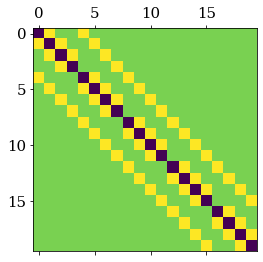

In [9]:
import matplotlib.pyplot as plt
plt.matshow(m)

Зададим вектор правой части системы 

In [10]:
b = np.zeros(m.shape[0])
b[m.shape[0]//2] = -1
print(b)

[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0. -1.  0.  0.  0.  0.  0.  0.  0.
  0.  0.]


Составить функцию, вычисляющую решение системы уравнений $m x=b$ методом Зейделя с заданной точностью $\epsilon$. Прокоментировать зависимость числа итераций, требуемых для достижения заданной точности, от $\epsilon$. 

In [11]:
def zelda(m, b, x0=None, eps=1e-6):
    L = np.tril(m)
    U = m - L
    
    if x0 is None:
        x0 = np.zeros(m.shape[0]).T
    x = [x0]
    
    diff = 1
    while diff > eps:
        x.append(np.linalg.inv(L) @ (b - U@x[-1]))
        diff = np.linalg.norm(x[-1]-x[-2], ord=2)
        
    return x

0.014301350910896128
0.0017044794349600255
0.00014240881532184398
1.6962372756777892e-05
1.4171894911983402e-06
1.688020148565855e-07
1.4103241670537752e-08
1.6798428512480906e-09
1.4034914330716172e-10
1.671705269268629e-11
1.3966896548884787e-12
1.6639829930830657e-13
1.3850581492468362e-14
1.6131100234830835e-15


Text(0.5, 1.0, 'Zeidel method')

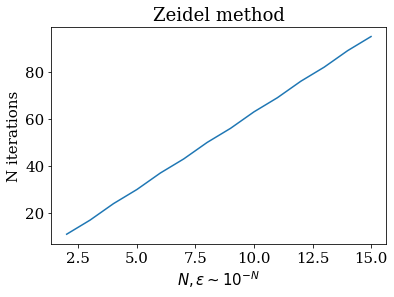

In [12]:
N = []
for n in range(2, 16):
    x = zelda(m, b, eps=10**(-n))
    print(np.linalg.norm(m@x[-1]-b, ord=2))
    N.append(len(x))
    
plt.plot(np.arange(2, 16), N)
plt.xlabel("$N, \epsilon \sim 10^{-N}$")
plt.ylabel("N iterations")
plt.title("Zeidel method")

Text(0.5, 0, 'Niter')

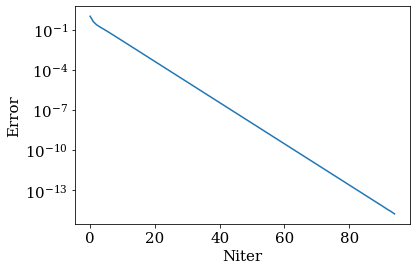

In [13]:
x = zelda(m, b, eps=1e-15)


err = []
it = np.arange(len(x))
for i in it:
    err.append(np.linalg.norm(m@x[i]-b,ord=2))
    
plt.semilogy(it, err)
plt.ylabel("Error")
plt.xlabel("Niter")

Метод Зейделя сходится как $\rho ^k$, $\rho$ - спектральный радиус матрички преобразования $x_{k} \rightarrow x_{k+1}$

# Задача 6. FAST PYTHON.

Изучите документ FastPython.ipynb .
Используя Numba, сделайте ускорение циклов в методе Зейделя в задаче 5.  Сравните время работы ускоренной и неускоренной программ. 

In [14]:
import numba as magic
import timeit

In [22]:
def zelda(m, b, x0=None, niter=100):
    L = np.tril(m)
    U = m - L
    
    x0 = np.zeros(m.shape[0]).T
    x = [x0]
    
    for _ in range(niter):
        x.append(np.linalg.inv(L) @ (b - U@x[-1]))
    return x

@magic.jit(nopython=True, nogil=True, fastmath=True)
def zelda_magic(m, b, x0=None, niter=100):
    L = np.tril(m)
    U = m - L
    
    x0 = np.zeros(m.shape[0]).T
    x = [x0]
    
    for i in magic.prange(niter):
        x.append(np.linalg.inv(L) @ (b - U@x[-1]))
    return x

In [16]:
%timeit x = zelda(m, b, niter=10000)

234 ms ± 16 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [23]:
%timeit x = zelda_magic(m, b, niter=10000)

89 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


__Вывод:__

- ну норм так ускорилось